# Storytelling From Data - Sleep Health Dataset

#### In this project, the importance of storytelling through data visualization will be demonstrated. A dataset containing information on sleep health will be analyzed, and graphs will be produced to explore the question: what are the most important factors contributing to good or bad sleep health in adults?

### Data Wrangling

First, relevant modules will be imported into the workspace to assist with the analysis of dataframes and creation of graphs.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Next, the dataset will be loaded into the workspace to check out its shape, data types, columns, and missing values. This dataset was sourced from Kaggle (https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset).

In [7]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


We can check out the shape of the dataset to see how many people were involved in the study and how many columns there are.

In [9]:
df.shape

(374, 13)

There are 374 patients in the study and 13 different features of the data to explore. We can now look at these features a bit more closely and check out their datatypes.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Right off the bat, we can get rid of the 'Person ID' column. It will not be useful for our visualization as it appears to just be a unique patient identifier.

In [13]:
df = df.drop('Person ID', axis = 1)

Also, it is important to check for missing values in each column before we get too deep into transforming the columns.

In [15]:
df.isna().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Luckily, there are only missing values in one column, so we will have to remember that when we take a look at that column later. For now, let's continue checking out the data types of the columns.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


The 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', and 'Daily Steps' columns are all numeric, which will be handy for visualization.

Some of the other categories, such as 'Gender' and 'BMI Category' can be converted into numbers through label encoding. 

In [20]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

We can change 'Male' into 1 and 'Female' into 0.

In [22]:
df['Gender'] = [1 if x == 'Male' else 0 for x in df['Gender']]
df['Gender'].value_counts()

Gender
1    189
0    185
Name: count, dtype: int64

Now let's take a look at BMI.

In [24]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

'Normal' and 'Normal Weight' appear to be the same, so those can be lumped into one category set equal to 0. 'Overweight' will be set to 1, and 'Obese' will be set to 2.

In [26]:
df['BMI Category'] = [1 if x == 'Overweight' else 2 if x == 'Obese' else 0 for x in df['BMI Category']]
df['BMI Category'].value_counts()

BMI Category
0    216
1    148
2     10
Name: count, dtype: int64

'Blood Pressure' can be converted split into 'Systolic' (top number) and 'Diastolic' (bottom number) to make it easier for analysis. Then, the 'Blood Pressure' column can be dropped.

In [28]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype('int64')
df['Diastolic'] = df['Diastolic'].astype('int64')
df = df.drop('Blood Pressure', axis = 1)

In [29]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,Software Engineer,6.1,6,42,6,1,77,4200,NaN,126,83
1,1,28,Doctor,6.2,6,60,8,0,75,10000,NaN,125,80
2,1,28,Doctor,6.2,6,60,8,0,75,10000,NaN,125,80
3,1,28,Sales Representative,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90
4,1,28,Sales Representative,5.9,4,30,8,2,85,3000,Sleep Apnea,140,90


Let's take a look at the categories in the 'Sleep Disorder' column. Remember, this one had missing values.

In [31]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

It would be reasonable to assume that the missing values means that these participants have no known sleeping disorder. For ease of analysis, we will combine Sleep Apnea and Insomnia together into value 1 signifying that the participant has a sleeping disorder, and 0 for no disorder.

In [33]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['Sleep Disorder'] = [0 if x == 'None' else 1 for x in df['Sleep Disorder']]
df['Sleep Disorder'].value_counts()

Sleep Disorder
0    219
1    155
Name: count, dtype: int64

Looks like we just have 'Occupation' left as type object. Let's check out the values in that column.

In [35]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

This column has 11 unique values. To turn this into numeric data, one hot encoding could be utilized. However, that would add 10 additional columns, nearly doubling the number of features that we have. For now, we will ignore this column, and if we feel we need more data for visualization, we will come back to it.

In [37]:
df = df.drop('Occupation', axis = 1)

### Data Visualization

To begin to visualize our data, we will start out with some histograms to understand the distribution of each feature.

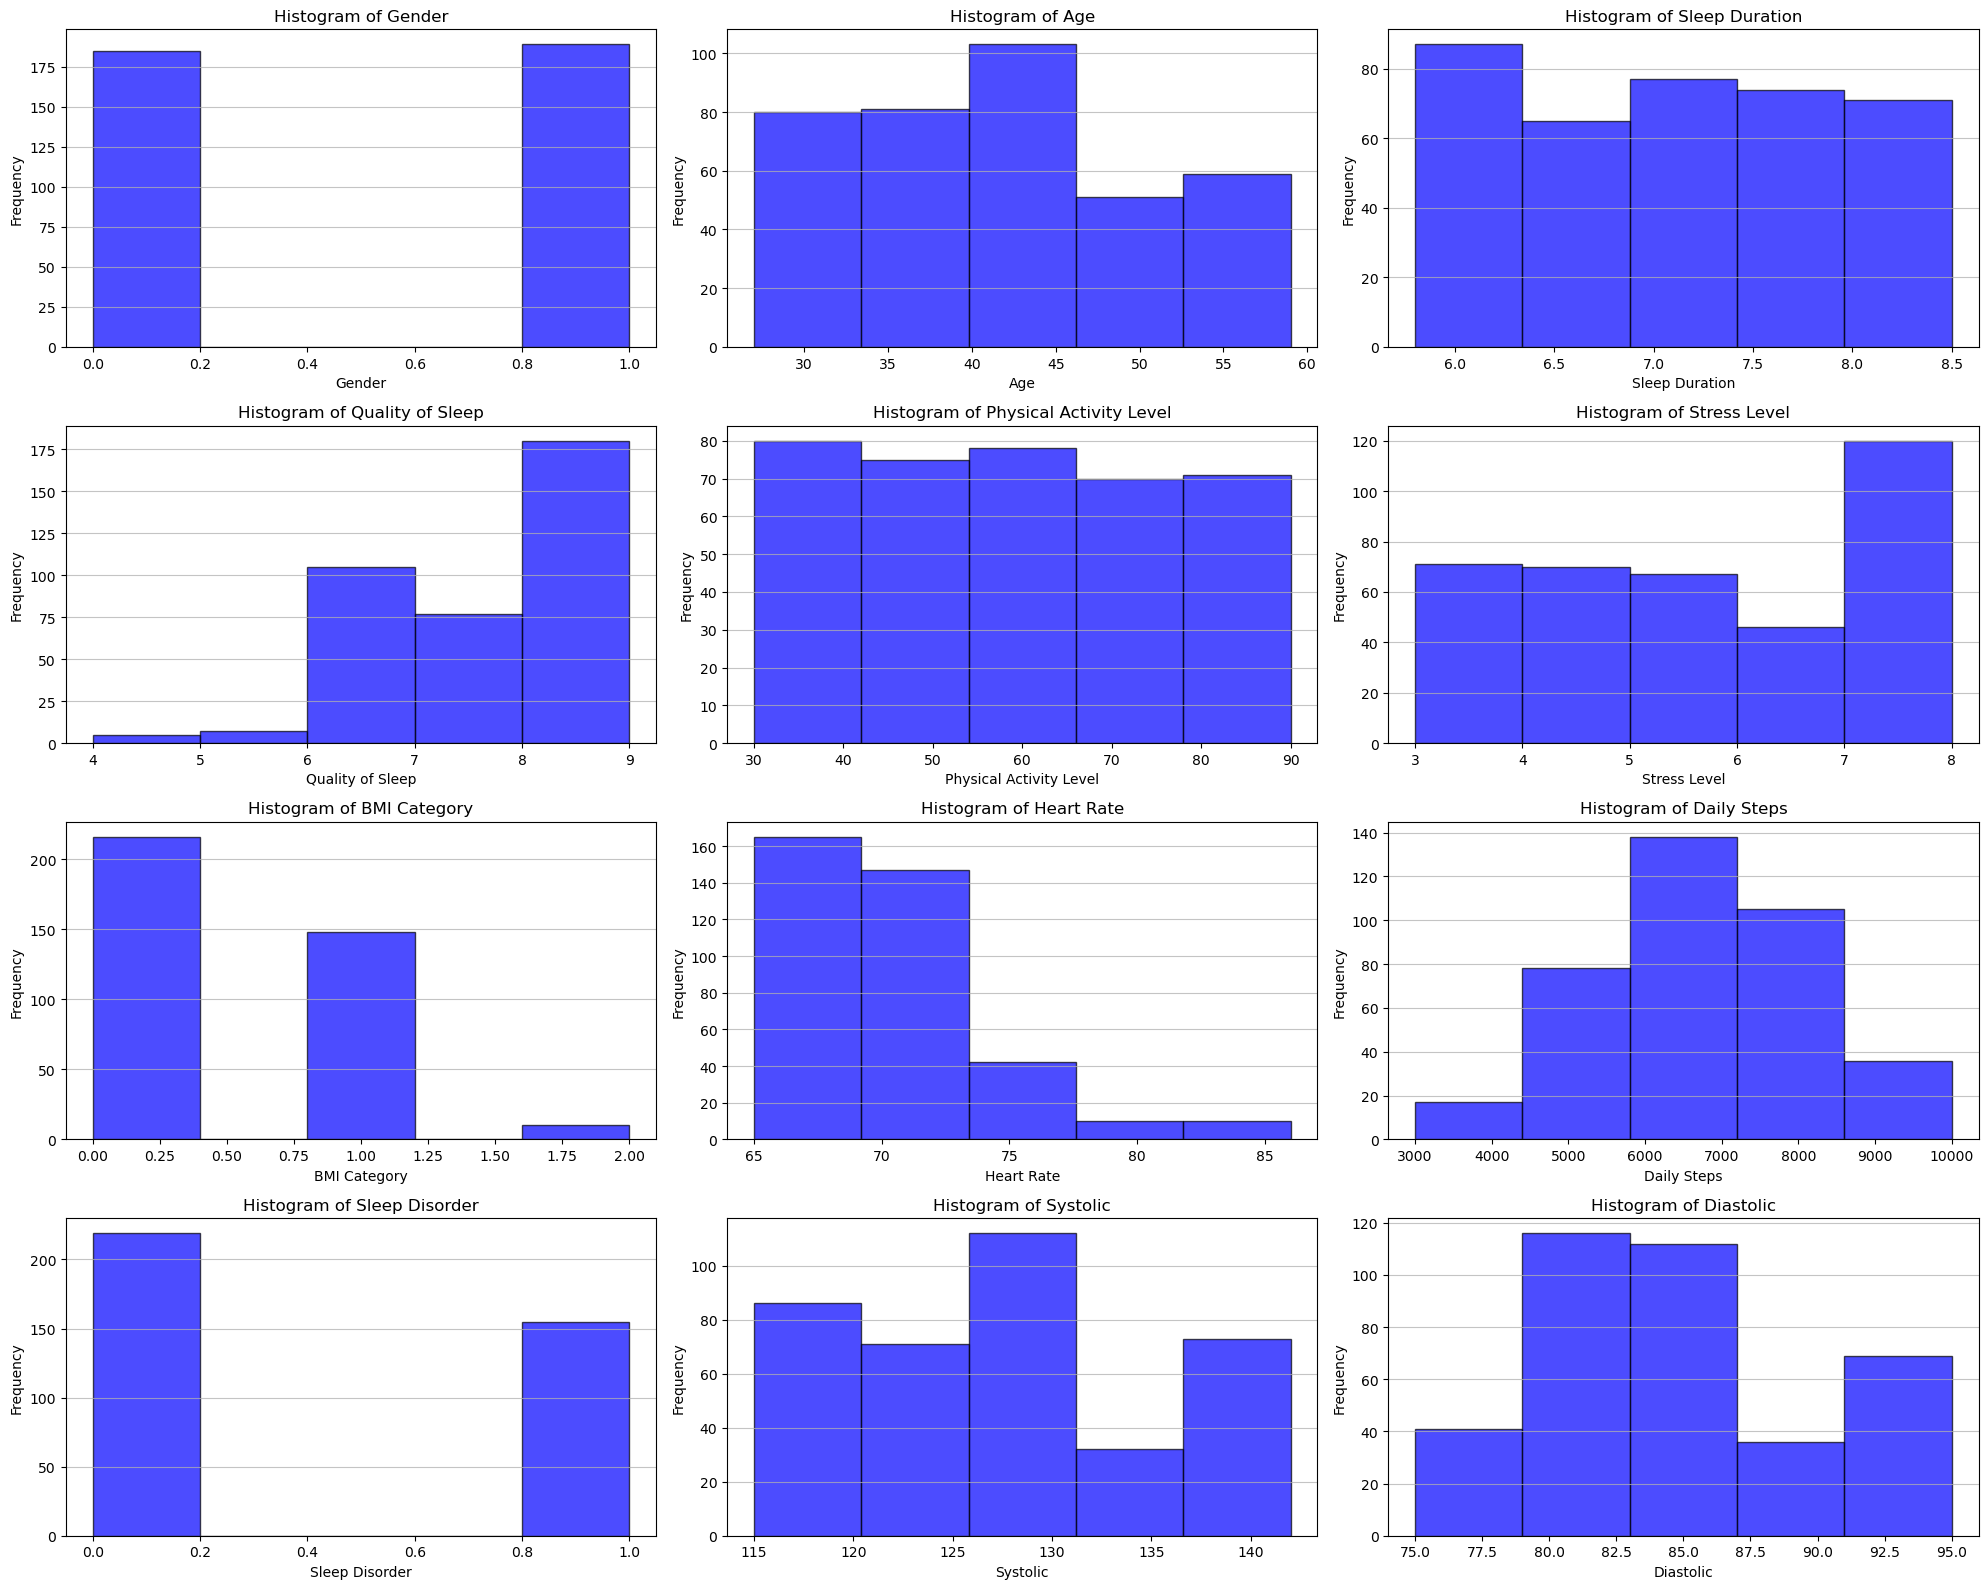

In [40]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axs = axs.flatten()

for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins = 5, alpha=0.7, color='blue', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y', alpha=0.75)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

There is a wide range of distributions in this data. Each feature will be briefly commented on.
##### Gender
There appears to be a somewhat equivalent number of males and females in the dataset.
##### Age
The distribution of ages is somewhat uniform, with a peak around 45 years old and a range from about 30-60.
##### Sleep Duration
Sleep duration also has a somewhat uniform distribution, with a range from about 6-8.5 hours.
##### Quality of Sleep
This measures a subjective rating of the quality of sleep, ranging from 1 to 10. This distribution skews toward the left, with more higher values than lower values.
##### Physical Activity Level
This is the average minutes of physical activity per day, and has a uniform distribution ranging from about 30-90 minutes.
##### Stress Level
Similar to quality of sleep, this measures a subject rating of stress level ranging from 1 to 10. This skews to the left, with more higher values than lower values.
##### BMI Category
Most people in the study are of normal weight (0), followed by overweight (1) and obese (2).
##### Heart Rate
This distribution is skewed to the right, with more lower values than higher values, ranging from about 65 to 85.
##### Daily Steps
This follows a normal distribution, peaking around 6-7k steps per day.
##### Sleep Disorder
More people in the study do not have a sleeping disorder (0) than do (1).
##### Systolic 
This feature has a somewhat uniform distribution with a slight peak around 130.
##### Diastolic
This feature has a somewhat normal distribution, peaking around 80-85.

To answer the question of what has the biggest effect on sleep quality, the 'Quality of Sleep' will be selected as the target feature.

A heatmap will be constructed to see which values have the highest correlation with 'Quality of Sleep'

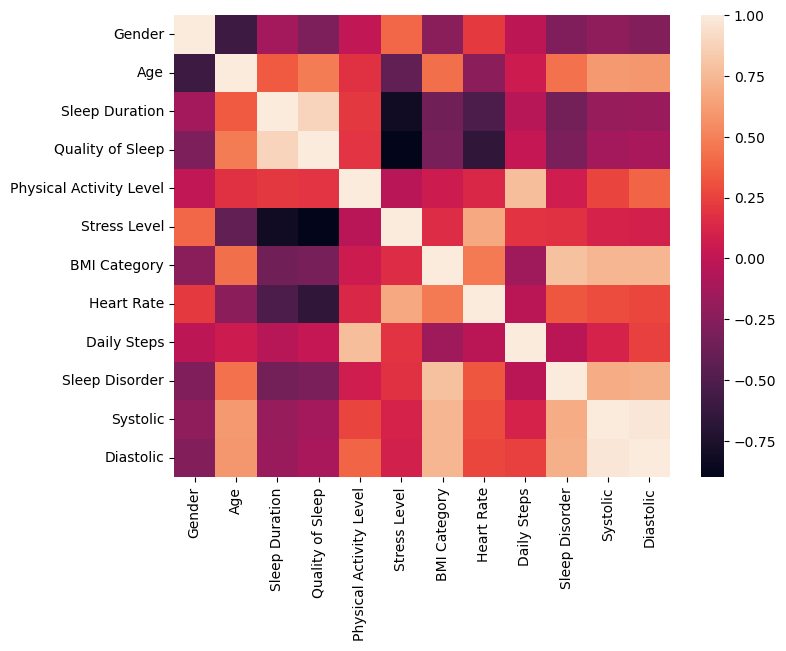

In [44]:
plt.subplots(figsize = (8, 6))
sns.heatmap(df.corr(numeric_only=True));

'Quality of Sleep' has a high positive correlation with 'Sleep Duration'. This suggest that increased sleep quality and duration go hand in hand, which makes intuitive sense.
'Quality of Sleep' has high negative correlations with 'Stress Level' and 'Heart Rate'. These also make sense, as you would expect someone to have better sleep quality when their stress is lower. Also, the lower one's heart rate, the more physically fit they are expected to be, and better fitness level is known to be connected to better sleep. 'Gender', 'BMI Category', and 'Sleep Disorder' also have negative correlations with 'Quality of Sleep'. Since males are encoded as 1 and females as 0, this suggests that females have better sleep quality. Similarly, since individuals with normal weight are encoded as 0, this suggests that as one crosses into overweight and obese categories, quality of sleep decreases. As expected, having a sleep disorder (encoded as 1) would lead to lower quality of sleep.

To further explore these relationships, scatterplots with 'Quality of Sleep' on the y-axis will be constructed for each feature. 

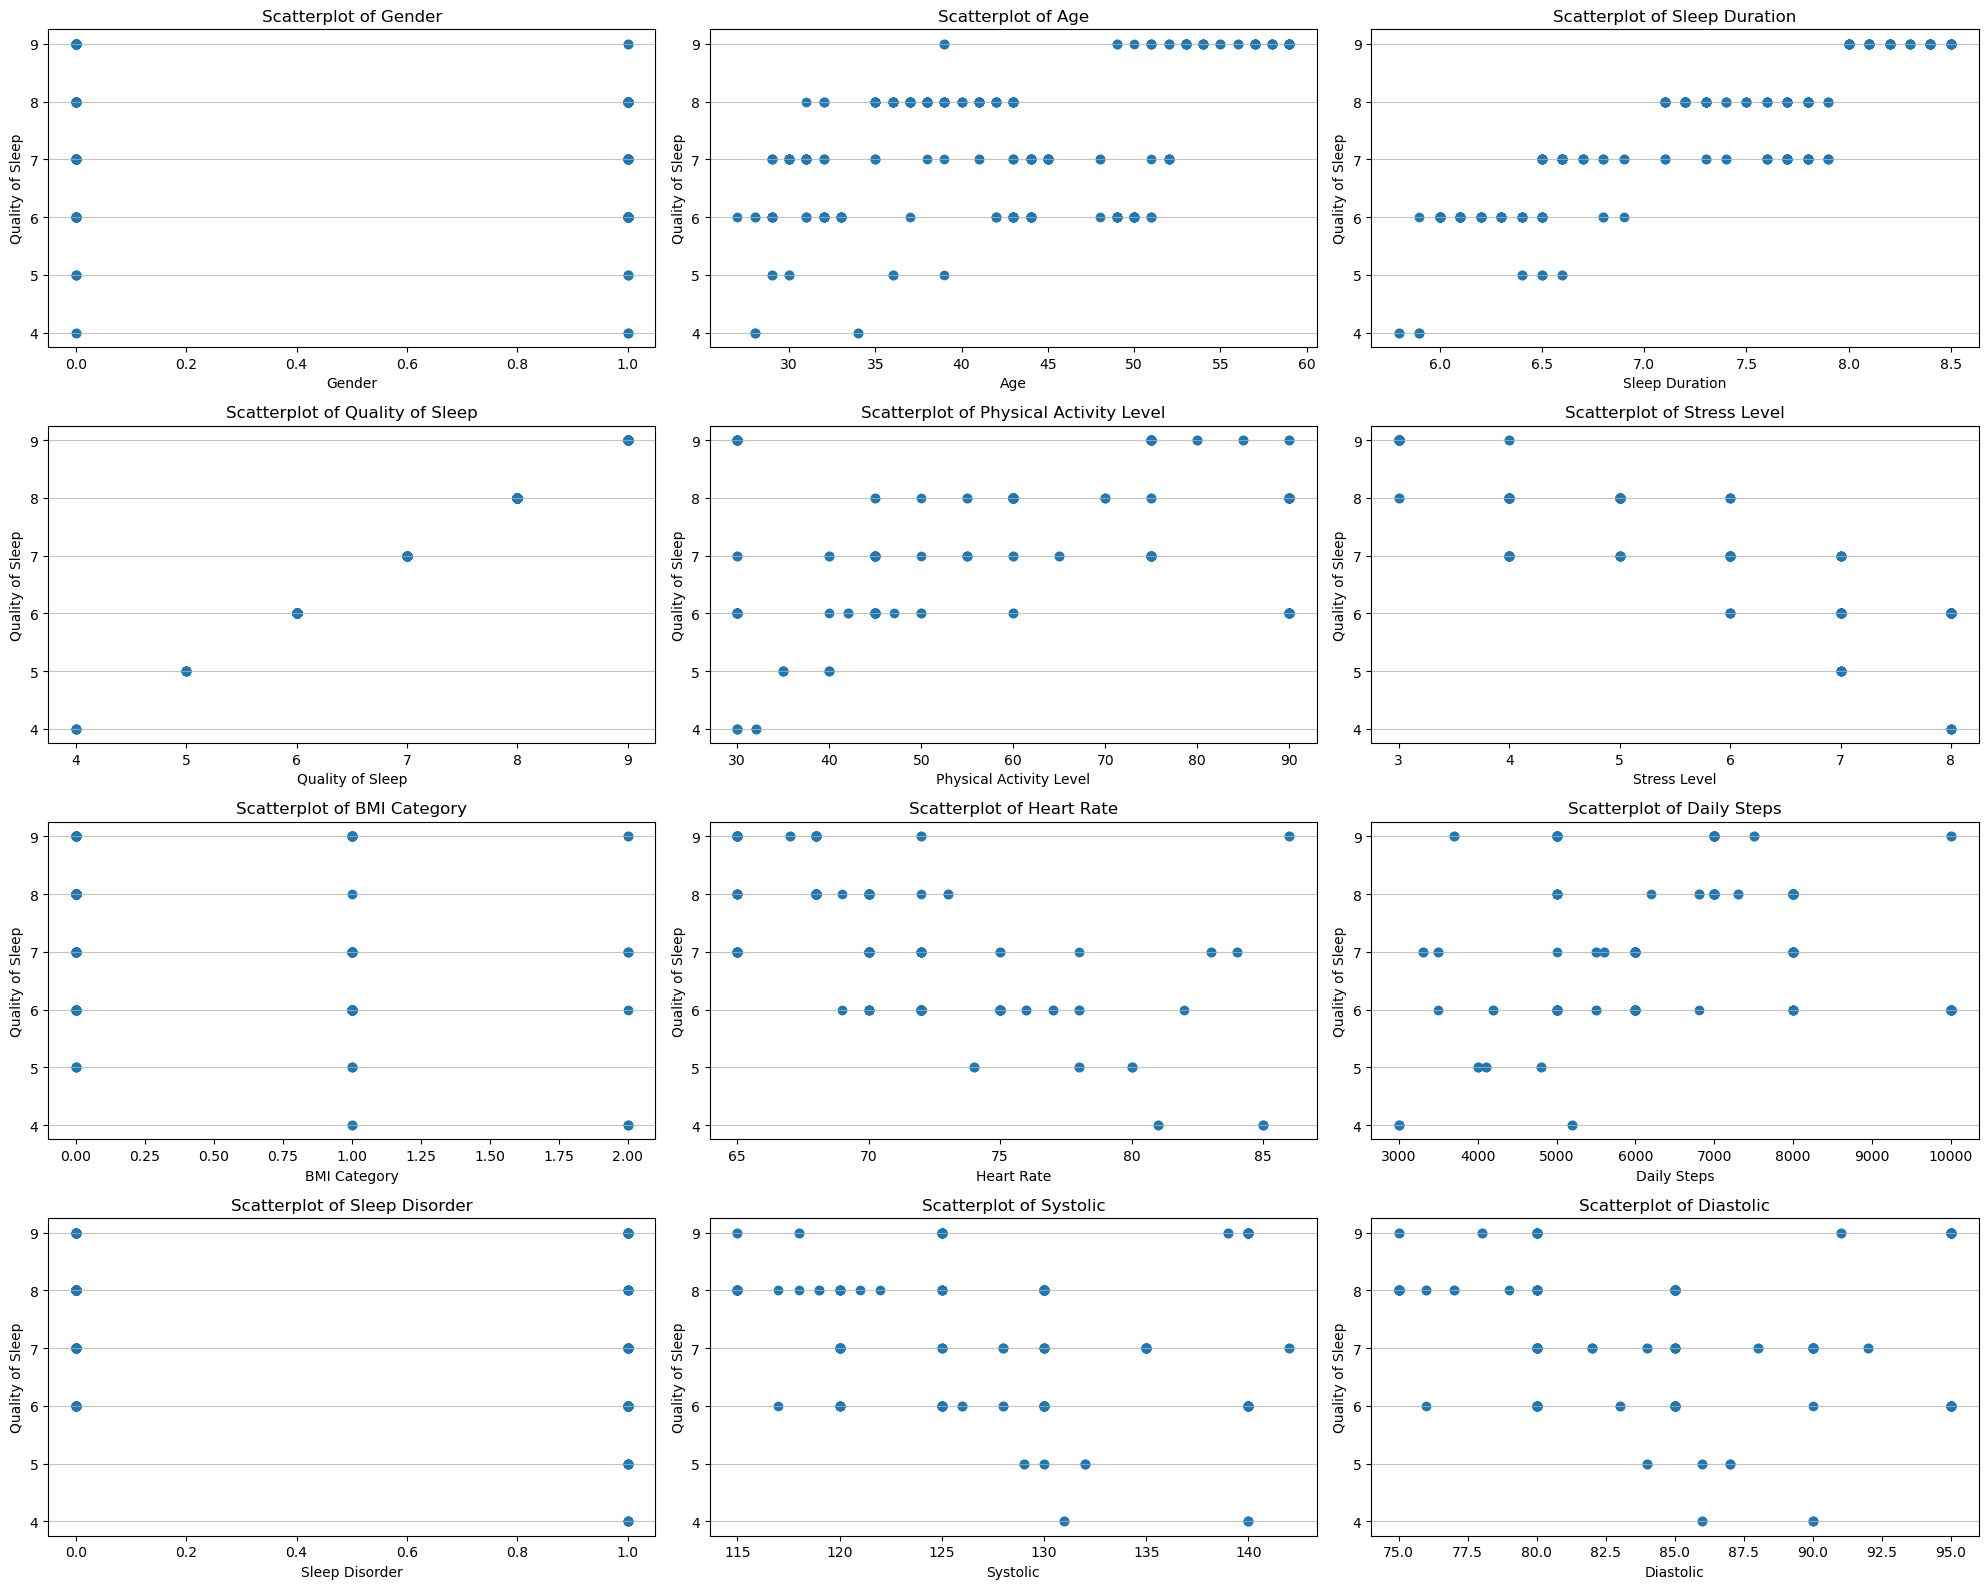

In [47]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axs = axs.flatten()

for i, column in enumerate(df.columns):
    axs[i].scatter(df[column], df['Quality of Sleep'])
    axs[i].set_title(f'Scatterplot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Quality of Sleep')
    axs[i].grid(axis='y', alpha=0.75)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Confirming what we saw in the heatmap, 'Sleep Duration' has a strong positive correlation with 'Quality of Sleep', along with slight positive correlations with 'Age' and 'Activity Level'. 'Stress Level' and 'Heart Rate' have strong negative correlations.

### Conclusions

This analysis demonstrated the importance of data visualization in hypothesis development and storytelling. In this project, data on sleep health was cleaned and visualized to find variables that appear to impact sleep quality. It was determined through this exercise that sleep duration, activity level, stress level, and heart rate seem to be highly correlated with sleep quality. This is useful to know before heading into model development steps, as you can confirm that these features will be important in the creation of a predictive model of sleep quality. Additionally, this information would be useful to know as a doctor or an individual interested in sleep health, as it can suggest lifestyle changes that can improve sleep quality.